In [1]:
import pandas as pd

In [3]:
babynames_df = pd.read_csv('baby-names.csv', delimiter=",")

In [5]:
babynames_df

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy
...,...,...,...,...
257995,2008,Carleigh,0.000128,girl
257996,2008,Iyana,0.000128,girl
257997,2008,Kenley,0.000127,girl
257998,2008,Sloane,0.000127,girl


In [7]:
babynames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258000 entries, 0 to 257999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     258000 non-null  int64  
 1   name     258000 non-null  object 
 2   percent  258000 non-null  float64
 3   sex      258000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ MB


In [9]:
babynames_df.describe()

,year,percent
count,258000.000000,258000.000000
mean,1944.000000,0.000894
std,37.238046,0.003016
min,1880.000000,0.000026
25%,1912.000000,0.000081
50%,1944.000000,0.000164
75%,1976.000000,0.000507
max,2008.000000,0.081541


In [15]:
babynames_df.describe(include='all')

,year,name,percent,sex
count,258000.000000,258000,258000.000000,258000
unique,NaN,6782,NaN,2
top,NaN,Jessie,NaN,boy
freq,NaN,258,NaN,129000
mean,1944.000000,NaN,0.000894,NaN
std,37.238046,NaN,0.003016,NaN
min,1880.000000,NaN,0.000026,NaN
25%,1912.000000,NaN,0.000081,NaN
50%,1944.000000,NaN,0.000164,NaN
75%,1976.000000,NaN,0.000507,NaN


In [19]:
babynames_df.shape

(258000, 4)

In [21]:
babynames_df.isna().sum()

year       0
name       0
percent    0
sex        0
dtype: int64

1. Which baby names commonly span genders? (e.g. I kind of want to know the percentage of Jessie that is boy vs. girl)
2. How has the popularity of the name Theodore changed over time?
3. How has gender distribution changed over time?

**FIRST ANALYSIS: THEODORE**

In [24]:
theofilter = babynames_df['name'] == 'Theodore'

In [32]:
theo_df = babynames_df[theofilter]

In [28]:
theo_df

,year,name,percent,sex
69,1880,Theodore,0.001959,boy
1078,1881,Theodore,0.001644,boy
2074,1882,Theodore,0.001901,boy
3080,1883,Theodore,0.001645,boy
4080,1884,Theodore,0.001719,boy
...,...,...,...,...
124312,2004,Theodore,0.000476,boy
125300,2005,Theodore,0.000514,boy
126295,2006,Theodore,0.000516,boy
127300,2007,Theodore,0.000513,boy


In [34]:
theo_df.groupby('year')['percent'].mean()

year
1880    0.001959
1881    0.001644
1882    0.001901
1883    0.001645
1884    0.001719
          ...   
2004    0.000476
2005    0.000514
2006    0.000516
2007    0.000513
2008    0.000522
Name: percent, Length: 129, dtype: float64

<Axes: title={'center': 'Baby Names\nPercentage of Babies Named Theodore'}, xlabel='year'>

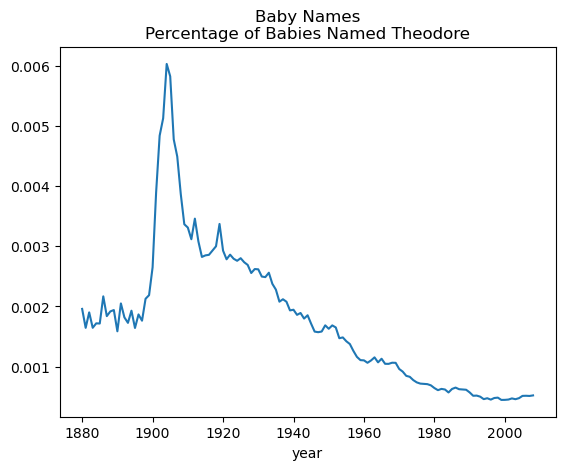

In [76]:
theo_df.groupby('year')['percent'].mean().plot(title = 'Baby Names\nPercentage of Babies Named Theodore')

**SECOND ANALYSIS: JESSIE**

In [40]:
jessiefilter = babynames_df['name'] == 'Jessie'

In [45]:
jessie_df = babynames_df[jessiefilter]

In [51]:
jessie_df.groupby('sex').count()['name']

sex
boy     129
girl    129
Name: name, dtype: int64

In [53]:
jessie_df.groupby('year')['name'].count()

year
1880    2
1881    2
1882    2
1883    2
1884    2
       ..
2004    2
2005    2
2006    2
2007    2
2008    2
Name: name, Length: 129, dtype: int64

In [55]:
jessie_df.sample(10)

,year,name,percent,sex
114275,1994,Jessie,0.000484,boy
239253,1990,Jessie,0.000543,girl
123410,2003,Jessie,0.000299,boy
183128,1934,Jessie,0.001656,girl
1090,1881,Jessie,0.001320,boy
112272,1992,Jessie,0.000500,boy
178109,1929,Jessie,0.001950,girl
70201,1950,Jessie,0.000560,boy
103203,1983,Jessie,0.000624,boy
236214,1987,Jessie,0.000653,girl


In [72]:
jessie_df[jessie_df['year'] == 1990]

,year,name,percent,sex
110230,1990,Jessie,0.000584,boy
239253,1990,Jessie,0.000543,girl


In [90]:
jessiegirl_filter = jessie_df['sex'] == 'girl'
jessieboy_filter = jessie_df['sex'] == 'boy'
jessiegirl_df = jessie_df[jessiegirl_filter]
jessieboy_df = jessie_df[jessieboy_filter]

In [96]:
girljessie = jessiegirl_df.groupby('year')['percent'].mean()
boyjessie = jessieboy_df.groupby('year')['percent'].mean()

<Axes: title={'center': 'Jessie Boy vs. Girl'}, xlabel='year'>

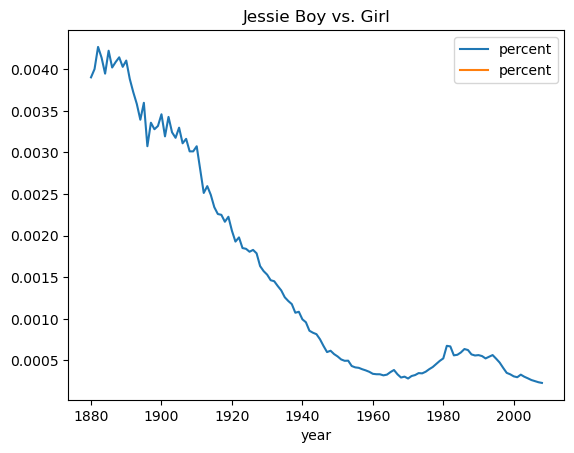

In [102]:
ax = girljessie.plot(kind='line', legend= True, title="Jessie Boy vs. Girl")
boyjessie.plot(ax=ax, legend = True)

**MOVING TO VARIETY OF BOY VS GIRL NAMES**

In [108]:
boy_filter = babynames_df['sex'] == 'boy'
girl_filter = babynames_df['sex'] == 'girl'
girl_df = babynames_df[girl_filter]
boy_df = babynames_df[boy_filter]

In [110]:
girl_df.groupby('year').count()

,name,percent,sex
year,,,
1880,1000,1000,1000
1881,1000,1000,1000
1882,1000,1000,1000
1883,1000,1000,1000
1884,1000,1000,1000
...,...,...,...
2004,1000,1000,1000
2005,1000,1000,1000
2006,1000,1000,1000


*lol this was a dumb question would have helped to read the background, top 1000 names means there are 1000 of each. makes me wonder if the percentage is percentage of total babies still though*

In [ ]:
**

In [131]:
babynames_df['name'].value_counts()[:10]

name
Jessie       258
Leslie       247
Guadalupe    244
Jean         244
Lee          240
James        239
John         238
William      237
Robert       235
Francis      229
Name: count, dtype: int64